## MNIST 
#### MNIST 손글씨 이미지를 다음의 방법으로 분류하고 test data를 이용하여 정확도를 비교하여라.
1. Softmax Regression
2. Support Vector Machine
3. Decision tree or Random forest

In [ ]:
from keras.datasets import mnist
from tensorflow import keras
from keras import models 
from keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import seaborn as sns
import tensorflow as tf


(X, y), (X_test, y_test) = mnist.load_data()

Softmax Regression

AttributeError: ignored

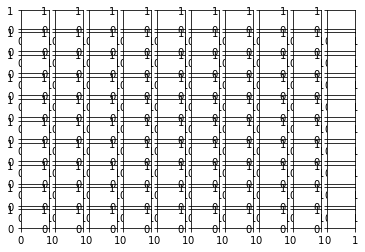

In [ ]:
fig,ax = plt.subplots(10,10) 
k = 0
for i in range(10): 
    for j in range(10): 
        ax[i][j].imshow(mnist.train.images[k].reshape(28,28), aspect='auto') 
        k += 1
plt.show() 

In [ ]:

num_features = 784
num_labels = 10 
learning_rate = 0.04
batch_size = 128
num_steps = 5001
  
train_dataset = mnist.train.images 
train_labels = mnist.train.labels 
test_dataset = mnist.test.images 
test_labels = mnist.test.labels 
valid_dataset = mnist.validation.images 
valid_labels = mnist.validation.labels 
  
graph = tf.Graph() 
  
with graph.as_default(): 
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, num_features)) 
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels)) 
    tf_valid_dataset = tf.constant(valid_dataset) 
    tf_test_dataset = tf.constant(test_dataset) 
  
    weights = tf.Variable(tf.truncated_normal([num_features, num_labels])) 
    biases = tf.Variable(tf.zeros([num_labels])) 
  
    logits = tf.matmul(tf_train_dataset, weights) + biases 
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits( 
                        labels=tf_train_labels, logits=logits)) 
  
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss) 
  
    train_prediction = tf.nn.softmax(logits) 
    valid_prediction = tf.nn.softmax(tf.matmul(tf_valid_dataset, weights) + biases) 
    test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases) 

AttributeError: ignored

In [ ]:
train_dataset = mnist.train.images 
train_labels = mnist.train.labels 
test_dataset = mnist.test.images 
test_labels = mnist.test.labels 
valid_dataset = mnist.validation.images 
valid_labels = mnist.validation.labels 

AttributeError: ignored

In [ ]:
graph = tf.Graph() 
  
with graph.as_default(): 
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, num_features)) 
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels)) 
    tf_valid_dataset = tf.constant(valid_dataset) 
    tf_test_dataset = tf.constant(test_dataset) 

AttributeError: ignored

In [ ]:
    weights = tf.Variable(tf.truncated_normal([num_features, num_labels])) 
    biases = tf.Variable(tf.zeros([num_labels])) 
  
    logits = tf.matmul(tf_train_dataset, weights) + biases 
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits( 
                        labels=tf_train_labels, logits=logits)) 
  
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss) 
  
    train_prediction = tf.nn.softmax(logits) 
    valid_prediction = tf.nn.softmax(tf.matmul(tf_valid_dataset, weights) + biases) 
    test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases) 

AttributeError: ignored

In [ ]:
def accuracy(predictions, labels): 
    correctly_predicted = np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) 
    accu = (100.0 * correctly_predicted) / predictions.shape[0] 
    return accuracy
  
    for step in range(num_steps): 
        offset = np.random.randint(0, train_labels.shape[0] - batch_size - 1) 
  
        batch_data = train_dataset[offset:(offset + batch_size), :] 
        batch_labels = train_labels[offset:(offset + batch_size), :] 
  
        feed_dict = {tf_train_dataset : batch_data, 
                     tf_train_labels : batch_labels} 
  
        _, l, predictions = session.run([optimizer, loss, train_prediction], 
                                        feed_dict=feed_dict) 
  
        if (step % 500 == 0): 
            print("Minibatch loss at step {0}: {1}".format(step, l)) 
            print("Minibatch accuracy: {:.1f}%".format( 
                accuracy(predictions, batch_labels))) 
            print("Validation accuracy:{:.1f}%".format( 
                accuracy(valid_prediction.eval(), valid_labels))) 
  
    print("\nTest accuracy {:.1f}%".format( 
        accuracy(test_prediction.eval(), test_labels))) 